In [4]:
import sys

In [5]:
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install gym==0.23.1
!{sys.executable} -m pip install pygame

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached gym-0.23.1-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.25.1
    Uninstalling gym-0.25.1:
      Successfully uninstalled gym-0.25.1
Defaulting to user installation because normal site-packages is not writeable


In [6]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
# from gym.envs.toy_text.frozen_lake import generate_random_map


/home/sam/.local/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn


In [10]:
def trainModel(env, num_episodes, learning_rate, discount_rate, max_exploration_rate, min_exploration_rate, exploration_decay_factor=5, linear_exploration=False):

    max_steps_per_episode = 1000

    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    exploration_rate = max_exploration_rate
    exploration_decay_rate = (
        max_exploration_rate - min_exploration_rate) / num_episodes
    rewards_all_episodes = []

    # Q-Learning algorithm
    for episode in range(num_episodes):
        state = env.reset()

        done = False
        rewards_current_episode = 0

        for step in range(max_steps_per_episode):

            # Exploration / Exploitation trade-off
            exploration_rate_threshold = random.uniform(0, 1)
            
            if np.sum(q_table[state]) > 0 and exploration_rate_threshold > exploration_rate:
                action = np.argmax(q_table[state, :])
            else:
                action = env.action_space.sample()

            new_state, reward, done, info = env.step(action)

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                learning_rate * (reward + discount_rate *
                                 np.max(q_table[new_state, :]))

            state = new_state
            rewards_current_episode += reward

            if done == True:
                break

        # Exploration rate decay
        if linear_exploration:
            exploration_rate -= exploration_decay_rate
        else:
            exploration_rate =(max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*exploration_decay_factor*episode)

        rewards_all_episodes.append(rewards_current_episode)
    return rewards_all_episodes


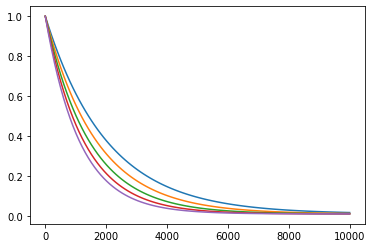

In [12]:
def explorationDecayRate(episodes,max,min,factor):
  decay_rate = (max-min)/episodes
  x = np.linspace(0,episodes,num=100)
  y = min+(max-min)*np.exp(-decay_rate*factor*x)
  plt.plot(x,y)

for i in range(5,10):
  explorationDecayRate(10000,1,0.01,i)

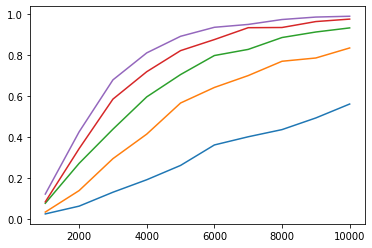

In [13]:
env = gym.make("FrozenLake-v1", is_slippery=False, map_name="4x4")

num_episodes = 10000
n = 1000

for i in range(1, 6):
    rewards_all_episodes = trainModel(env=env, num_episodes=num_episodes, learning_rate=0.4,
                                      discount_rate=0.9, max_exploration_rate=1, min_exploration_rate=0.01, exploration_decay_factor=i)
    rewards_per_n_episodes = np.split(
        np.array(rewards_all_episodes), num_episodes / n)
    x = (np.arange(num_episodes / n)+1)*n
    y = np.sum(rewards_per_n_episodes, 1)/n
    plt.plot(x, y)


In [284]:
env = gym.make("FrozenLake-v1", is_slippery=False, map_name="8x8")
env.reset()
print(env.step(0))

(0, 0.0, False, {'prob': 1.0})


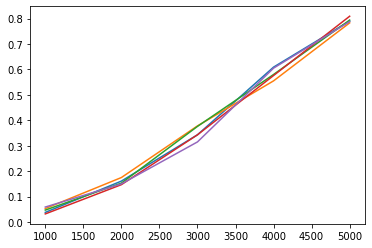

In [14]:
num_episodes = 5000
n = 1000

for i in range(5):
    rewards_all_episodes = trainModel(env=env, num_episodes=num_episodes, learning_rate=0.4,
                                      discount_rate=0.9, max_exploration_rate=1, min_exploration_rate=0.1, linear_exploration=True)
    rewards_per_n_episodes = np.split(
        np.array(rewards_all_episodes), num_episodes / n)
    x = (np.arange(num_episodes / n)+1)*n
    y = np.sum(rewards_per_n_episodes, 1)/n
    plt.plot(x, y)


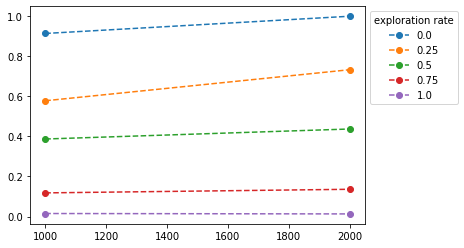

In [16]:
num_episodes = 2000
n = 1000

for i in np.linspace(0,1,num=5):
    rewards_all_episodes = trainModel(env=env, num_episodes=num_episodes, learning_rate=0.4,
                                      discount_rate=0.95, max_exploration_rate=i, min_exploration_rate=i, linear_exploration=True)
    rewards_per_n_episodes = np.split(
        np.array(rewards_all_episodes), num_episodes / n)
    x = (np.arange(num_episodes / n)+1)*n
    y = np.sum(rewards_per_n_episodes, 1)/n
    plt.plot(x, y,'o--', label=i)
    plt.legend(title="exploration rate", bbox_to_anchor=(1,1))


In [87]:
num_episodes = 1000



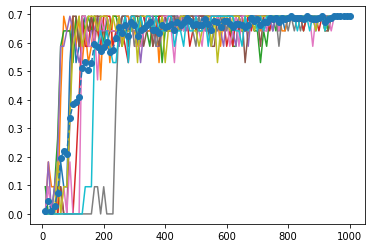

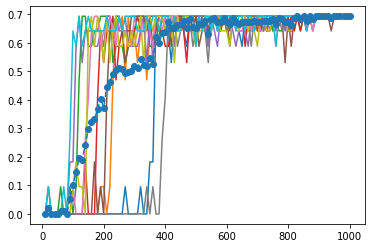

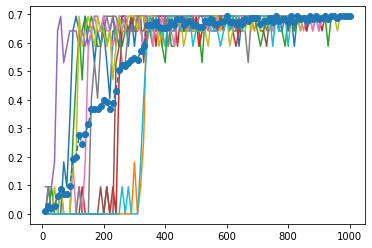

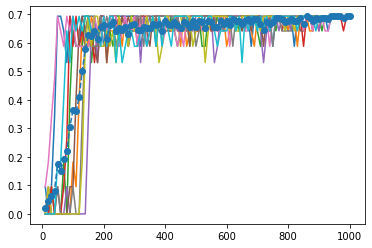

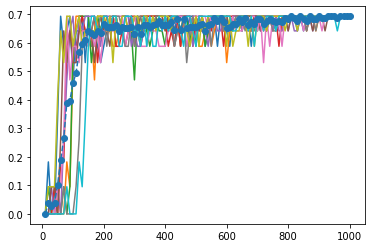

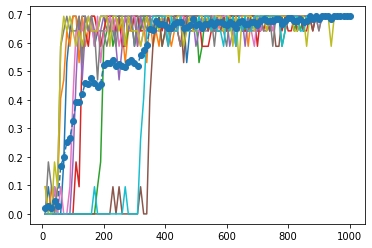

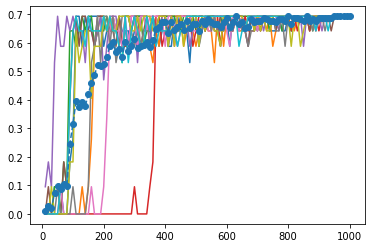

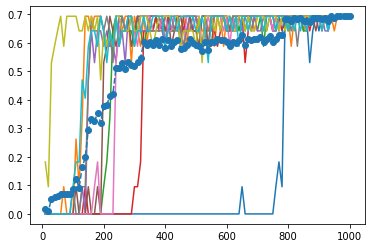

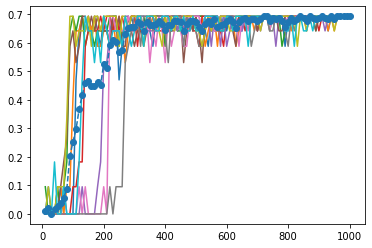

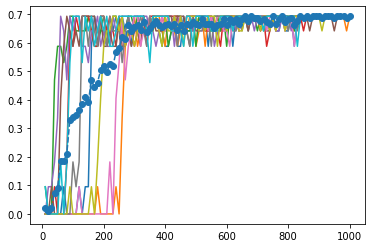

In [54]:
num_episodes=1000
n = 10

env = gym.make("FrozenLake-v1", is_slippery=False, map_name="4x4")
number_of_tests = 10
learning_rate = np.linspace(0.001, 1, num=number_of_tests)
x=[]
y=[]
for i in learning_rate:
    i_x_all = []
    i_y_all = []
    for j in range(10):

        rewards_all_episodes = trainModel(env=env, num_episodes=num_episodes, learning_rate=i,
                                        discount_rate=0.5, max_exploration_rate=0.1, min_exploration_rate=0,exploration_decay_factor=5,linear_exploration=True)
        rewards_per_n_episodes = np.split(
            np.array(rewards_all_episodes), num_episodes / n)
        i_x = (np.arange(num_episodes / n)+1)*n
        i_y = np.sum(rewards_per_n_episodes, 1)/n
        if i_y[-1 ] == 0:
            continue
        plt.plot(i_x, (i_y+1)**2, label=j)
        i_x_all.append(i_x)
        i_y_all.append((i_y+1)**2)
    i_x_avg = np.mean(i_x_all,0)
    i_y_avg = np.mean(i_y_all,0)
    x.append(i_x_avg)
    y.append(i_y_avg)
    plt.plot(i_x_avg, i_y_avg,'o--', label='average')
    # plt.legend(title="iteration", bbox_to_anchor=(1,1))
    plt.show()
    


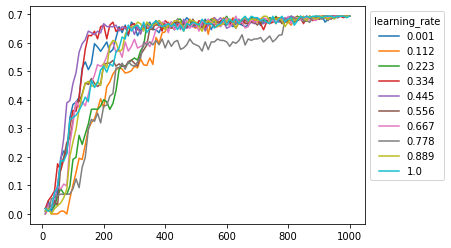

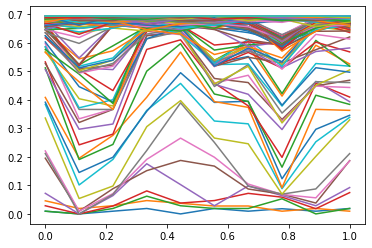

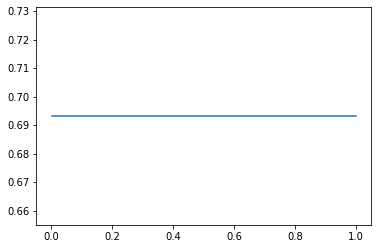

In [55]:
for i in range(number_of_tests):
    plt.plot(x[i],y[i], label=learning_rate[i])

plt.legend(title="learning_rate", bbox_to_anchor=(1,1))
plt.show()
y = np.asarray(y)
_,bins = y.shape
for i in range(bins):
    plt.plot(learning_rate, y[0:,i])

plt.show()
plt.plot(learning_rate,y[0:,-1])

In [36]:
# random_map = generate_random_map(size=4, p=0.8)
# env = gym.make("FrozenLake-v0", desc=random_map)
env = gym.make("FrozenLake-v1", is_slippery=False, map_name="4x4")
for episode in range(1):
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)

    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
            clear_output(wait=True)
            break
            
        state = new_state
        
env.close()

****You reached the goal!****


: 